In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

<h1><b><center>Movie Analysis</center></b></h1>

## Reading data

In [2]:
pd.options.mode.chained_assignment = None 

In [3]:
df_1 =  pd.read_csv('IMDBdata_MainData.csv')

In [4]:
df_2 = pd.read_csv('IMDBdata_MainData2.csv')

In [5]:
df_1.shape

(5273, 27)

In [6]:
df_2.shape

(5382, 27)

In [7]:
data = pd.concat([df_1,df_2]).drop_duplicates(subset=['Title']).reset_index(drop=True)

In [8]:
data

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,tomatoURL
0,Code Name: K.O.Z.,2015,NOT RATED,13 Feb 2015,114 min,"Crime, Mystery",Celal Çimen,NaN,"Cem Kurtoglu, Hakan Ural, Hazim Körmükçü, Tolg...",A look at the 17-25 December 2013 corruption s...,...,1.6,"24,600",tt4458206,movie,NaN,NaN,NaN,NaN,True,NaN
1,Saving Christmas,2014,PG,14 Nov 2014,80 min,"Comedy, Family",Darren Doane,"Darren Doane, Cheston Hervey","Kirk Cameron, Darren Doane, Bridgette Cameron,...",Kirk is enjoying the annual Christmas party ex...,...,1.6,"12,686",tt4009460,movie,03 Nov 2015,"$2,778,297",IPD/Samuel Goldwyn Films,http://www.savingchristmas.com/,True,http://www.rottentomatoes.com/m/kirk_camerons_...
2,Superbabies: Baby Geniuses 2,2004,PG,27 Aug 2004,88 min,"Comedy, Family, Sci-Fi",Bob Clark,"Steven Paul (story), Gregory Poppen (screenplay)","Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",A group of smart-talking toddlers find themsel...,...,2.0,"26,376",tt0270846,movie,04 Jan 2005,"$9,016,422",Sony,http://www.sonypictures.com/movies/superbabies...,True,http://www.rottentomatoes.com/m/super_babies_b...
3,Daniel der Zauberer,2004,NOT RATED,12 Aug 2004,81 min,"Comedy, Crime, Fantasy",Ulli Lommel,Ulli Lommel (screenplay),"Daniel Küblböck, Ulli Lommel, Rudolf Waldemar ...","Evil assassins want to kill Daniel Kublbock, t...",...,1.9,"13,060",tt0421051,movie,NaN,NaN,NaN,NaN,True,http://www.rottentomatoes.com/m/daniel_der_zau...
4,Manos: The Hands of Fate,1966,NOT RATED,15 Nov 1966,70 min,Horror,Harold P. Warren,Harold P. Warren (screenplay),"Tom Neyman, John Reynolds, Diane Adelson, Haro...",A family gets lost on the road and stumbles up...,...,1.9,"31,768",tt0060666,movie,07 Oct 2003,NaN,Sinister Cinema,NaN,True,http://www.rottentomatoes.com/m/manos-the-hand...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5361,Lethal Weapon,2016–,NaN,21 Sep 2016,60 min,"Action, Crime, Drama",NaN,Matthew Miller,"Damon Wayans, Clayne Crawford, Keesha Sharp, K...",TV show based on the popular 'Lethal Weapon' f...,...,8.0,"18,080",tt5164196,series,NaN,NaN,NaN,NaN,True,NaN
5362,Van Helsing,2016–,NaN,23 Sep 2016,60 min,"Action, Drama, Fantasy",NaN,NaN,"Kelly Overton, Christopher Heyerdahl, Jonathan...","Vanessa Helsing, distant relative of famous va...",...,5.8,"6,245",tt5197820,series,NaN,NaN,NaN,NaN,True,NaN
5363,Conviction,2016–2017,NaN,03 Oct 2016,42 min,Drama,NaN,"Liz Friedlander, Liz Friedman","Hayley Atwell, Eddie Cahill, Shawn Ashmore, Me...",A brilliant attorney and former First Daughter...,...,7.3,"5,475",tt5396572,series,NaN,NaN,NaN,NaN,True,NaN
5364,Animal Kingdom,2016–,TV-MA,14 Jun 2016,60 min,"Crime, Drama",NaN,Jonathan Lisco,"Finn Cole, Aamya Deva Keroles, Ellen Barkin, S...","The series centers on 17-year-old Joshua """"J""""...",...,8.1,"7,599",tt5574490,series,NaN,NaN,NaN,NaN,True,NaN


In [10]:
# scraped KIM data
with open('kinds_in_mind_data.json', 'r') as f:
    kim = json.load(f)

In [11]:
kim_data = pd.DataFrame(kim.items(), columns=['Title', 'Rating'])

In [12]:
kim_data

,Title,Rating
0,Abandon,4.4.4
1,Abduction,4.5.5
2,Abominable,1.2.1
3,About A Boy,3.3.5
4,About Last Night,7.2.10
...,...,...
5402,The Ballad of Little Jo,6.5.3
5403,The Band’s Visit,5.2.5
5404,The Banger Sisters,7.2.6
5405,The Bank Job,8.8.7


## Data processing

In [13]:
temp_join = pd.merge(data,kim_data,on='Title')

In [14]:
temp_join

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,tomatoURL,Rating
0,Superbabies: Baby Geniuses 2,2004,PG,27 Aug 2004,88 min,"Comedy, Family, Sci-Fi",Bob Clark,"Steven Paul (story), Gregory Poppen (screenplay)","Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",A group of smart-talking toddlers find themsel...,...,"26,376",tt0270846,movie,04 Jan 2005,"$9,016,422",Sony,http://www.sonypictures.com/movies/superbabies...,True,http://www.rottentomatoes.com/m/super_babies_b...,2.3.2
1,Disaster Movie,2008,PG-13,29 Aug 2008,87 min,Comedy,"Jason Friedberg, Aaron Seltzer","Jason Friedberg, Aaron Seltzer","Matt Lanter, Vanessa Lachey, Gary 'G. Thang' J...","Over the course of one evening, an unsuspectin...",...,"77,407",tt1213644,movie,06 Jan 2009,"$14,174,654",Lionsgate,http://disastermovie.net/,True,http://www.rottentomatoes.com/m/disaster_movie/,7.8.5
2,From Justin to Kelly,2003,PG,20 Jun 2003,81 min,"Comedy, Musical, Romance",Robert Iscove,Kim Fuller,"Kelly Clarkson, Justin Guarini, Katherine Bail...",A waitress from Texas and a college student fr...,...,"23,918",tt0339034,movie,26 Aug 2003,"$4,584,577",20th Century Fox,http://www.fromjustintokelly.com/,True,http://www.rottentomatoes.com/m/from_justin_to...,3.2.2
3,Son of the Mask,2005,PG,18 Feb 2005,94 min,"Comedy, Family, Fantasy",Lawrence Guterman,Lance Khazei,"Jamie Kennedy, Alan Cumming, Liam Falconer, Ry...","Tim Avery, an aspiring cartoonist, finds himse...",...,"43,443",tt0362165,movie,17 May 2005,"$16,967,576",New Line Cinema,http://www.sonofthemask.com/,True,http://www.rottentomatoes.com/m/son_of_the_mask/,3.4.3
4,Crossover,2006,PG-13,01 Sep 2006,95 min,"Action, Sport",Preston A. Whitmore II,Preston A. Whitmore II,"Anthony Mackie, Wesley Jonathan, Eva Marcille,...","A naturally talented basketball player, Noah C...",...,"8,778",tt0473024,movie,20 Feb 2007,"$7,009,668",Sony Pictures Entertainment,http://www.sony.com/crossover,True,http://www.rottentomatoes.com/m/crossover/,5.3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,The Family,2016,TV-PG,03 Mar 2016,60 min,"Drama, Mystery",NaN,Jenna Bans,"Joan Allen, Rupert Graves, Alison Pill, Margot...",A community is rattled when a politician's son...,...,"4,005",tt4428038,series,NaN,NaN,NaN,NaN,True,NaN,6.7.8
2674,Wolf Creek,2016–,NaN,12 May 2016,NaN,"Drama, Horror, Thriller",NaN,NaN,"Lucy Fry, John Jarratt, Dustin Clare, Andy McPhee","Eve, a 19-year-old American tourist is targete...",...,"2,005",tt4460878,series,NaN,NaN,NaN,NaN,True,NaN,4.8.7
2675,Van Helsing,2016–,NaN,23 Sep 2016,60 min,"Action, Drama, Fantasy",NaN,NaN,"Kelly Overton, Christopher Heyerdahl, Jonathan...","Vanessa Helsing, distant relative of famous va...",...,"6,245",tt5197820,series,NaN,NaN,NaN,NaN,True,NaN,4.7.2
2676,Conviction,2016–2017,NaN,03 Oct 2016,42 min,Drama,NaN,"Liz Friedlander, Liz Friedman","Hayley Atwell, Eddie Cahill, Shawn Ashmore, Me...",A brilliant attorney and former First Daughter...,...,"5,475",tt5396572,series,NaN,NaN,NaN,NaN,True,NaN,5.7.10


In [15]:
temp_join = temp_join[['Title','Rated','Released','Genre','Plot','Rating']]

In [16]:
temp_join['Year'] = temp_join['Released'].str.split(' ',expand=True)[2]

In [17]:
temp_join

,Title,Rated,Released,Genre,Plot,Rating,Year
0,Superbabies: Baby Geniuses 2,PG,27 Aug 2004,"Comedy, Family, Sci-Fi",A group of smart-talking toddlers find themsel...,2.3.2,2004
1,Disaster Movie,PG-13,29 Aug 2008,Comedy,"Over the course of one evening, an unsuspectin...",7.8.5,2008
2,From Justin to Kelly,PG,20 Jun 2003,"Comedy, Musical, Romance",A waitress from Texas and a college student fr...,3.2.2,2003
3,Son of the Mask,PG,18 Feb 2005,"Comedy, Family, Fantasy","Tim Avery, an aspiring cartoonist, finds himse...",3.4.3,2005
4,Crossover,PG-13,01 Sep 2006,"Action, Sport","A naturally talented basketball player, Noah C...",5.3.5,2006
...,...,...,...,...,...,...,...
2673,The Family,TV-PG,03 Mar 2016,"Drama, Mystery",A community is rattled when a politician's son...,6.7.8,2016
2674,Wolf Creek,NaN,12 May 2016,"Drama, Horror, Thriller","Eve, a 19-year-old American tourist is targete...",4.8.7,2016
2675,Van Helsing,NaN,23 Sep 2016,"Action, Drama, Fantasy","Vanessa Helsing, distant relative of famous va...",4.7.2,2016
2676,Conviction,NaN,03 Oct 2016,Drama,A brilliant attorney and former First Daughter...,5.7.10,2016


In [18]:
temp_join = temp_join.dropna()

In [19]:
temp_join[['Sex','Violence','Language']] = temp_join['Rating'].str.split('.',expand=True)

In [20]:
temp_join['agg_score'] = temp_join['Sex'].astype(int) + temp_join['Violence'].astype(int) + temp_join['Language'].astype(int)

In [21]:
temp_join

,Title,Rated,Released,Genre,Plot,Rating,Year,Sex,Violence,Language,agg_score
0,Superbabies: Baby Geniuses 2,PG,27 Aug 2004,"Comedy, Family, Sci-Fi",A group of smart-talking toddlers find themsel...,2.3.2,2004,2,3,2,7
1,Disaster Movie,PG-13,29 Aug 2008,Comedy,"Over the course of one evening, an unsuspectin...",7.8.5,2008,7,8,5,20
2,From Justin to Kelly,PG,20 Jun 2003,"Comedy, Musical, Romance",A waitress from Texas and a college student fr...,3.2.2,2003,3,2,2,7
3,Son of the Mask,PG,18 Feb 2005,"Comedy, Family, Fantasy","Tim Avery, an aspiring cartoonist, finds himse...",3.4.3,2005,3,4,3,10
4,Crossover,PG-13,01 Sep 2006,"Action, Sport","A naturally talented basketball player, Noah C...",5.3.5,2006,5,3,5,13
...,...,...,...,...,...,...,...,...,...,...,...
2667,Constantine,TV-14,24 Oct 2014,"Drama, Fantasy, Horror",A man struggling with his faith who is haunted...,2.8.5,2014,2,8,5,15
2671,Rush Hour,TV-14,31 Mar 2016,"Action, Comedy, Crime",TV show based on the action-comedy 'Rush Hour'...,1.6.5,2016,1,6,5,12
2672,Limitless,TV-14,22 Sep 2015,"Comedy, Crime, Drama",An average 28-year-old man who gains the abili...,6.7.5,2015,6,7,5,18
2673,The Family,TV-PG,03 Mar 2016,"Drama, Mystery",A community is rattled when a politician's son...,6.7.8,2016,6,7,8,21


In [22]:
# checking % of empty ratings in RATED
temp_join[temp_join['Rated'] == ''].shape[0] / temp_join.shape[0]

0.0

In [23]:
temp_join['Rated'].value_counts()

R            1122
PG-13        1051
PG            379
G              59
TV-14          14
UNRATED        10
TV-MA           6
APPROVED        6
TV-PG           6
NOT RATED       4
NC-17           2
TV-Y            1
TV-G            1
Name: Rated, dtype: int64

In [24]:
# Making values uniiform

temp_join['Rated']= temp_join['Rated'].replace('TV-14', 'PG-13')
temp_join['Rated']= temp_join['Rated'].replace('TV-MA', 'R')
temp_join['Rated']= temp_join['Rated'].replace('TV-PG', 'PG')
temp_join['Rated']= temp_join['Rated'].replace('NC-17', 'R')
temp_join['Rated']= temp_join['Rated'].replace('TV-G', 'G')
temp_join['Rated']= temp_join['Rated'].replace('TV-Y', 'G')

#removing values which are not rated
temp_join = temp_join[temp_join.Rated != 'UNRATED']
temp_join = temp_join[temp_join.Rated != 'APPROVED']
temp_join = temp_join[temp_join.Rated != 'NOT RATED']

In [25]:
temp_join['Rated'].value_counts()

R        1130
PG-13    1065
PG        385
G          61
Name: Rated, dtype: int64

In [26]:
pd.DataFrame(temp_join.groupby('Year')['Title'].count())

,Title
Year,
1938,1
1960,1
1962,1
1963,1
1964,1
1967,1
1969,1
1972,2
1973,2


In [27]:
# Ignoring all values before 1992
post92 = temp_join[temp_join['Year'].astype(int) > 1991]

In [28]:
post92

,Title,Rated,Released,Genre,Plot,Rating,Year,Sex,Violence,Language,agg_score
0,Superbabies: Baby Geniuses 2,PG,27 Aug 2004,"Comedy, Family, Sci-Fi",A group of smart-talking toddlers find themsel...,2.3.2,2004,2,3,2,7
1,Disaster Movie,PG-13,29 Aug 2008,Comedy,"Over the course of one evening, an unsuspectin...",7.8.5,2008,7,8,5,20
2,From Justin to Kelly,PG,20 Jun 2003,"Comedy, Musical, Romance",A waitress from Texas and a college student fr...,3.2.2,2003,3,2,2,7
3,Son of the Mask,PG,18 Feb 2005,"Comedy, Family, Fantasy","Tim Avery, an aspiring cartoonist, finds himse...",3.4.3,2005,3,4,3,10
4,Crossover,PG-13,01 Sep 2006,"Action, Sport","A naturally talented basketball player, Noah C...",5.3.5,2006,5,3,5,13
...,...,...,...,...,...,...,...,...,...,...,...
2667,Constantine,PG-13,24 Oct 2014,"Drama, Fantasy, Horror",A man struggling with his faith who is haunted...,2.8.5,2014,2,8,5,15
2671,Rush Hour,PG-13,31 Mar 2016,"Action, Comedy, Crime",TV show based on the action-comedy 'Rush Hour'...,1.6.5,2016,1,6,5,12
2672,Limitless,PG-13,22 Sep 2015,"Comedy, Crime, Drama",An average 28-year-old man who gains the abili...,6.7.5,2015,6,7,5,18
2673,The Family,PG,03 Mar 2016,"Drama, Mystery",A community is rattled when a politician's son...,6.7.8,2016,6,7,8,21


### 2605 rows of data

## Calculating unweighted and weighted scores

In [29]:
percentages = post92.groupby('Year')['Rated'].apply(lambda x: x.value_counts(normalize = True)).unstack()

In [30]:
percentages['unw_kim_score'] = post92.groupby('Year')['agg_score'].mean()

In [31]:
percentages

,G,PG,PG-13,R,unw_kim_score
Year,,,,,
1992,0.105263,0.105263,0.157895,0.631579,11.368421
1993,0.035714,0.357143,0.214286,0.392857,11.464286
1994,0.023810,0.166667,0.357143,0.452381,12.238095
1995,0.038462,0.057692,0.307692,0.596154,13.865385
1996,0.043478,0.144928,0.275362,0.536232,12.797101
1997,0.016129,0.129032,0.338710,0.516129,13.080645
1998,0.034483,0.114943,0.298851,0.551724,13.080460
1999,0.024390,0.097561,0.308943,0.569106,14.284553
2000,0.048000,0.112000,0.400000,0.440000,14.120000


In [32]:
viz_df = percentages.reset_index()
viz_df['unw_kim_score'] = viz_df['unw_kim_score'].astype('float64')
viz_df['Year'] = viz_df['Year'].astype('int32')

### Unweighted score plot

<AxesSubplot:xlabel='Year', ylabel='unw_kim_score'>

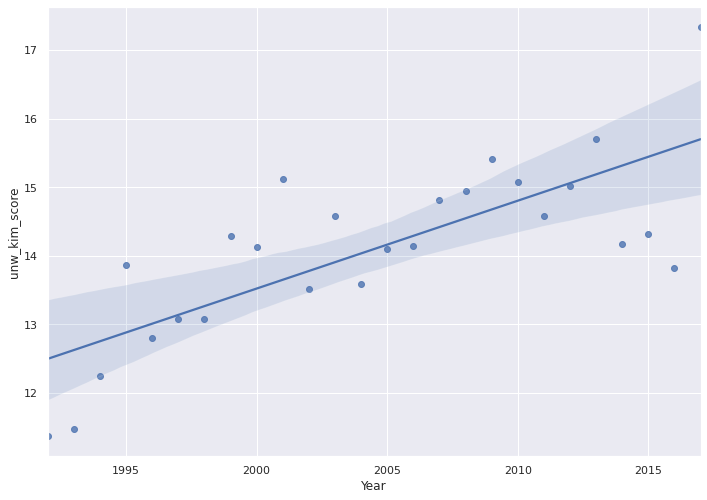

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x=viz_df['Year'],y=viz_df['unw_kim_score'],ci=95)

In [35]:
# Normalizing problem:
'''
Each year, the distribution of movies assessed changes. To account for this change, need a weighted avg of KIM scores for each year.
Possible solution: Calculate mean of % movies analyzed each year. 
Calculate weighted avg of KIM movies using this mean
'''
mean_percentage = dict(percentages.mean())
mean_percentage

{'G': 0.027542145324484773,
 'PG': 0.14628153266443222,
 'PG-13': 0.391126801120227,
 'R': 0.4438536735307746,
 'unw_kim_score': 14.09535422508884}

In [36]:
normalize_dict = percentages.to_dict()
normalize_dict

{'G': {'1992': 0.10526315789473684,
  '1993': 0.03571428571428571,
  '1994': 0.023809523809523808,
  '1995': 0.038461538461538464,
  '1996': 0.043478260869565216,
  '1997': 0.016129032258064516,
  '1998': 0.034482758620689655,
  '1999': 0.024390243902439025,
  '2000': 0.048,
  '2001': 0.037037037037037035,
  '2002': 0.03007518796992481,
  '2003': 0.017391304347826087,
  '2004': 0.0078125,
  '2005': 0.032520325203252036,
  '2006': 0.022222222222222223,
  '2007': 0.0078125,
  '2008': 0.028368794326241134,
  '2009': 0.007246376811594203,
  '2010': 0.015748031496062992,
  '2011': 0.03289473684210526,
  '2012': nan,
  '2013': 0.008,
  '2014': 0.008064516129032258,
  '2015': 0.008547008547008548,
  '2016': nan,
  '2017': nan},
 'PG': {'1992': 0.10526315789473684,
  '1993': 0.35714285714285715,
  '1994': 0.16666666666666666,
  '1995': 0.057692307692307696,
  '1996': 0.14492753623188406,
  '1997': 0.12903225806451613,
  '1998': 0.11494252873563218,
  '1999': 0.0975609756097561,
  '2000': 0.112

In [242]:
def calculate_weighted_score(row,col_num):
    year = row[6]
    rated = row[1]
    weight = mean_percentage[rated] / normalize_dict[rated][year] 
    return row[col_num] * weight

In [243]:
# post92['weighted_agg'] = post92.apply(lambda x: calculate_weighted_score(x), axis = 1)
post92['weighted_agg'] = post92.apply(calculate_weighted_score,args=[10], axis=1)

In [244]:
post92

,Title,Rated,Released,Genre,Plot,Rating,Year,Sex,Violence,Language,agg_score,weighted_agg
0,Superbabies: Baby Geniuses 2,PG,27 Aug 2004,"Comedy, Family, Sci-Fi",A group of smart-talking toddlers find themsel...,2.3.2,2004,2,3,2,7,4.519595
1,Disaster Movie,PG-13,29 Aug 2008,Comedy,"Over the course of one evening, an unsuspectin...",7.8.5,2008,7,8,5,20,16.220259
2,From Justin to Kelly,PG,20 Jun 2003,"Comedy, Musical, Romance",A waitress from Texas and a college student fr...,3.2.2,2003,3,2,2,7,6.197718
3,Son of the Mask,PG,18 Feb 2005,"Comedy, Family, Fantasy","Tim Avery, an aspiring cartoonist, finds himse...",3.4.3,2005,3,4,3,10,10.583899
4,Crossover,PG-13,01 Sep 2006,"Action, Sport","A naturally talented basketball player, Noah C...",5.3.5,2006,5,3,5,13,11.634365
...,...,...,...,...,...,...,...,...,...,...,...,...
2667,Constantine,PG-13,24 Oct 2014,"Drama, Fantasy, Horror",A man struggling with his faith who is haunted...,2.8.5,2014,2,8,5,15,13.990305
2671,Rush Hour,PG-13,31 Mar 2016,"Action, Comedy, Crime",TV show based on the action-comedy 'Rush Hour'...,1.6.5,2016,1,6,5,12,9.016502
2672,Limitless,PG-13,22 Sep 2015,"Comedy, Crime, Drama",An average 28-year-old man who gains the abili...,6.7.5,2015,6,7,5,18,14.976601
2673,The Family,PG,03 Mar 2016,"Drama, Mystery",A community is rattled when a politician's son...,6.7.8,2016,6,7,8,21,22.424959


In [40]:
percentages['weighted_kim_score'] = post92.groupby('Year')['weighted_agg'].mean()

### Weighted score plot

<AxesSubplot:xlabel='Year', ylabel='weighted_kim_score'>

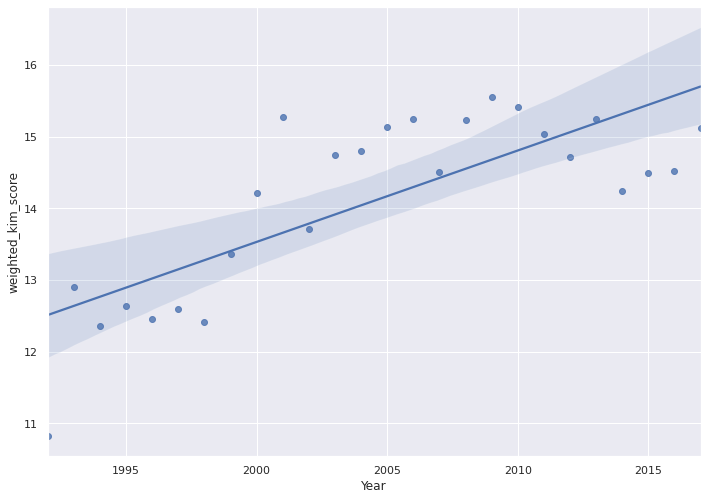

In [41]:
viz_df = percentages.reset_index()
viz_df['weighted_kim_score'] = viz_df['weighted_kim_score'].astype('float64')
viz_df['Year'] = viz_df['Year'].astype('int32')

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x=viz_df['Year'],y=viz_df['weighted_kim_score'],ci=95)

### Category-wise distribution of scores

In [250]:
cols_to_process = ['Sex','Violence','Language']
for col in cols_to_process:
    post92[col] = post92[col].astype('int32')



In [253]:
post92['weighted_sex'] = post92.apply(calculate_weighted_score,args=[7], axis=1)
post92['weighted_violence'] = post92.apply(calculate_weighted_score,args=[8], axis=1)
post92['weighted_language'] = post92.apply(calculate_weighted_score,args=[9], axis=1)
post92

,Title,Rated,Released,Genre,Plot,Rating,Year,Sex,Violence,Language,agg_score,weighted_agg,weighted_sex,weighted_violence,weighted_language
0,Superbabies: Baby Geniuses 2,PG,27 Aug 2004,"Comedy, Family, Sci-Fi",A group of smart-talking toddlers find themsel...,2.3.2,2004,2,3,2,7,4.519595,1.291313,1.936969,1.291313
1,Disaster Movie,PG-13,29 Aug 2008,Comedy,"Over the course of one evening, an unsuspectin...",7.8.5,2008,7,8,5,20,16.220259,5.677090,6.488103,4.055065
2,From Justin to Kelly,PG,20 Jun 2003,"Comedy, Musical, Romance",A waitress from Texas and a college student fr...,3.2.2,2003,3,2,2,7,6.197718,2.656165,1.770776,1.770776
3,Son of the Mask,PG,18 Feb 2005,"Comedy, Family, Fantasy","Tim Avery, an aspiring cartoonist, finds himse...",3.4.3,2005,3,4,3,10,10.583899,3.175170,4.233560,3.175170
4,Crossover,PG-13,01 Sep 2006,"Action, Sport","A naturally talented basketball player, Noah C...",5.3.5,2006,5,3,5,13,11.634365,4.474756,2.684853,4.474756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,Constantine,PG-13,24 Oct 2014,"Drama, Fantasy, Horror",A man struggling with his faith who is haunted...,2.8.5,2014,2,8,5,15,13.990305,1.865374,7.461496,4.663435
2671,Rush Hour,PG-13,31 Mar 2016,"Action, Comedy, Crime",TV show based on the action-comedy 'Rush Hour'...,1.6.5,2016,1,6,5,12,9.016502,0.751375,4.508251,3.756876
2672,Limitless,PG-13,22 Sep 2015,"Comedy, Crime, Drama",An average 28-year-old man who gains the abili...,6.7.5,2015,6,7,5,18,14.976601,4.992200,5.824234,4.160167
2673,The Family,PG,03 Mar 2016,"Drama, Mystery",A community is rattled when a politician's son...,6.7.8,2016,6,7,8,21,22.424959,6.407131,7.474986,8.542842


In [254]:
percentages['weighted_sex_score'] = post92.groupby('Year')['weighted_sex'].mean()
percentages['weighted_violence_score'] = post92.groupby('Year')['weighted_violence'].mean()
percentages['weighted_language_score'] = post92.groupby('Year')['weighted_language'].mean()

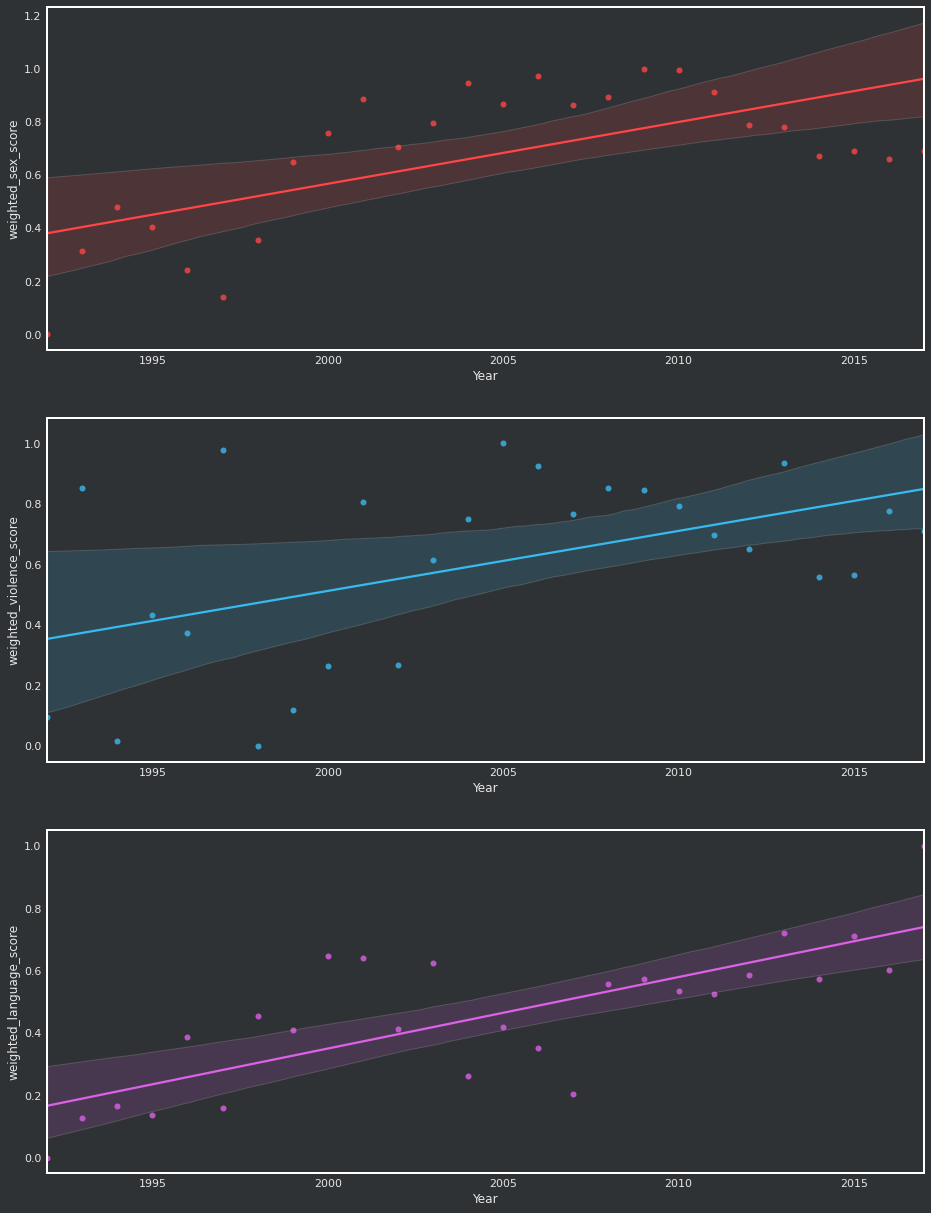

In [319]:
cols_to_graph = ['weighted_sex_score','weighted_violence_score','weighted_language_score']

temp_viz_df = percentages.reset_index()
temp_viz_df['Year'] = temp_viz_df['Year'].astype('int32')

# normalizing
temp_viz_df[cols_to_graph] = temp_viz_df[cols_to_graph].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

fig, ax = plt.subplots(3,figsize=(14,20))

sns.set_theme(style="whitegrid")
plt.style.use("seaborn-dark")

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#2F3235'  # bluish dark grey

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

colors = ['#FF4545','#38BAEE','#DB61E5']
    
for i, col in enumerate(cols_to_graph):
    

    plt.rcParams['axes.linewidth'] = 2
    sns.regplot(x=temp_viz_df['Year'],y=temp_viz_df[col],ci=95,ax=ax[i],color=colors[i])

### Correlation between scores

In [341]:
cols_corr = ['weighted_sex_score','weighted_violence_score','weighted_language_score']
combinations = combinations(cols_corr, 2)
for i in combinations:
    print(i)
    print(pearsonr(temp_viz_df[i[0]],temp_viz_df[i[1]]))

('weighted_sex_score', 'weighted_violence_score')
(0.4780037925623087, 0.013517140834902535)
('weighted_sex_score', 'weighted_language_score')
(0.5316793317405943, 0.005184505065872858)
('weighted_violence_score', 'weighted_language_score')
(0.23140397942637314, 0.2553604768710101)


<h1><b><center>Music Analysis</center></b></h1>

## Reading data

In [43]:
music_df = pd.read_csv('tcc_ceds_music.csv')

In [44]:
charts_df = pd.read_csv('charts.csv')

## Data processing

In [45]:
charts_df['song'] = charts_df['song'].str.lower()
charts_df

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,easy on me,Adele,1.0,1,3
1,2021-11-06,2,stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,industry baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,fancy like,Walker Hayes,4.0,3,19
4,2021-11-06,5,bad habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,over and over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,i believe in you,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,little serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,i'll get by (as long as i have you),Billy Williams,NaN,99,1


In [46]:
charts_df = charts_df.drop_duplicates(subset=['song','artist'])

In [47]:
charts_df['artist'] = charts_df['artist'].str.lower()

In [48]:
charts_df

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,easy on me,adele,1.0,1,3
1,2021-11-06,2,stay,the kid laroi & justin bieber,2.0,1,16
2,2021-11-06,3,industry baby,lil nas x & jack harlow,3.0,1,14
3,2021-11-06,4,fancy like,walker hayes,4.0,3,19
4,2021-11-06,5,bad habits,ed sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330076,1958-08-04,90,stay,the ames brothers,NaN,90,1
330082,1958-08-04,96,over and over,thurston harris,NaN,96,1
330084,1958-08-04,98,little serenade,the ames brothers,NaN,98,1
330085,1958-08-04,99,i'll get by (as long as i have you),billy williams,NaN,99,1


In [49]:
merged_music = music_df.merge(charts_df,left_on=['track_name','artist_name'], right_on=['song','artist'],how = 'inner')

In [50]:
merged_music

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,energy,topic,age,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,101,andy williams,it's the most wonderful time of the year,1953,pop,wonderful time year kid jingle bell tell good ...,79,0.001253,0.060214,0.001253,...,0.554541,night/time,0.957143,2021-01-09,28,it's the most wonderful time of the year,andy williams,5.0,5,21
1,125,bobby vinton,blue velvet,1954,pop,blue wear blue bluer night softer satin light ...,46,0.001462,0.001462,0.001462,...,0.258235,music,0.942857,1963-11-16,49,blue velvet,bobby vinton,26.0,1,15
2,265,the platters,remember when,1956,pop,remember dahdootdoodoo dahdootdoodoo lips afra...,39,0.001815,0.001815,0.214245,...,0.200175,sadness,0.914286,1959-08-17,88,remember when,the platters,74.0,41,9
3,330,andy williams,dear heart,1957,pop,dear heart wish warm night dear heart like yea...,40,0.001284,0.001284,0.001284,...,0.183158,romantic,0.900000,1965-02-06,41,dear heart,andy williams,38.0,24,11
4,341,andy williams,(where do i begin) love story,1957,pop,begin tell story great sweet story older simpl...,56,0.001012,0.001012,0.355473,...,0.453436,world/life,0.900000,1971-05-01,24,(where do i begin) love story,andy williams,20.0,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,82401,delinquent habits,tres delinquentes,2019,hip hop,freak brazos hardcore cleekhi enemeny pump spe...,57,0.115765,0.002506,0.002506,...,0.698689,obscene,0.014286,1996-09-07,93,tres delinquentes,delinquent habits,88.0,35,20
2870,82420,aaliyah,more than a woman,2019,hip hop,passion instant sweat bead feel cupid shoot he...,33,0.002392,0.094255,0.002392,...,0.644634,romantic,0.014286,2002-07-13,48,more than a woman,aaliyah,35.0,25,24
2871,82425,kurtis blow,basketball,2019,hip hop,chours play basketball basketball play basketb...,37,0.003096,0.003096,0.003096,...,0.706698,music,0.014286,1985-05-18,96,basketball,kurtis blow,83.0,71,6
2872,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.767761,obscene,0.014286,1995-04-15,99,whutcha want?,nine,89.0,50,17


In [51]:
pd.DataFrame(merged_music.groupby('release_date')['track_name'].count()).to_dict()

{'track_name': {1951: 1,
  1952: 4,
  1953: 1,
  1954: 6,
  1955: 1,
  1956: 6,
  1957: 3,
  1958: 9,
  1959: 34,
  1960: 37,
  1961: 26,
  1962: 52,
  1963: 55,
  1964: 59,
  1965: 47,
  1966: 52,
  1967: 44,
  1968: 45,
  1969: 33,
  1970: 39,
  1971: 41,
  1972: 45,
  1973: 60,
  1974: 47,
  1975: 61,
  1976: 39,
  1977: 45,
  1978: 48,
  1979: 50,
  1980: 54,
  1981: 71,
  1982: 57,
  1983: 63,
  1984: 58,
  1985: 44,
  1986: 51,
  1987: 63,
  1988: 53,
  1989: 49,
  1990: 37,
  1991: 58,
  1992: 40,
  1993: 47,
  1994: 31,
  1995: 36,
  1996: 28,
  1997: 34,
  1998: 40,
  1999: 54,
  2000: 39,
  2001: 40,
  2002: 41,
  2003: 40,
  2004: 44,
  2005: 50,
  2006: 45,
  2007: 56,
  2008: 53,
  2009: 39,
  2010: 41,
  2011: 52,
  2012: 41,
  2013: 42,
  2014: 39,
  2015: 60,
  2016: 50,
  2017: 48,
  2018: 55,
  2019: 41}}

In [52]:
post59 = merged_music[merged_music['release_date'] >= 1959][['artist_name','track_name','release_date','genre','lyrics','violence','obscene','topic','rank']]

In [53]:
# import profanity words
profanity_list = []
with open('bad_words.txt','r') as fp:
    for row in fp:
        profanity_list.append(row.replace('\n',''))

In [54]:
post59

,artist_name,track_name,release_date,genre,lyrics,violence,obscene,topic,rank
10,johnny mathis,let's love,1959,pop,let night young let life begin dream reality l...,0.000993,0.000993,romantic,85
11,the platters,if i didn't care,1959,pop,ask know true true course reply inside deny sa...,0.001316,0.163173,sadness,88
12,the platters,i'll never smile again,1959,pop,smile smile laugh good tear eye heart realize ...,0.003096,0.003096,sadness,43
13,connie francis,mama,1959,pop,even shadow fall lovely long recall years spen...,0.002632,0.002632,world/life,44
14,ricky nelson,sweeter than you,1959,pop,love sweeter belong sweeter stand long desire ...,0.003509,0.003509,romantic,78
...,...,...,...,...,...,...,...,...,...
2869,delinquent habits,tres delinquentes,2019,hip hop,freak brazos hardcore cleekhi enemeny pump spe...,0.002506,0.618758,obscene,93
2870,aaliyah,more than a woman,2019,hip hop,passion instant sweat bead feel cupid shoot he...,0.094255,0.002392,romantic,48
2871,kurtis blow,basketball,2019,hip hop,chours play basketball basketball play basketb...,0.003096,0.003096,music,96
2872,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,0.154302,0.356685,obscene,99


In [55]:
post59.genre.value_counts()

pop        1567
rock        518
country     410
blues       198
jazz        102
hip hop      41
reggae        7
Name: genre, dtype: int64

In [56]:
# low hiphop numbers. Clubbing hiphop with pop
post59['genre'].replace('hip hop','pop', inplace=True)

### Calculating profanity scores

In [57]:
def calculate_profanity(row, profanity_list = profanity_list):
    lyrics = row[4].split(' ')
    total_length = len(lyrics)
    counter = 0
    for word in lyrics:
        if word in profanity_list:
            counter += 1
    return (counter/total_length)*100 
    

In [58]:
post59['percent_prof'] = post59.apply(lambda x: calculate_profanity(x), axis=1)

In [60]:
prof_percent_year = pd.DataFrame(post59.groupby('release_date')['percent_prof'].mean().reset_index())

In [61]:
prof_percent_year

,release_date,percent_prof
0,1959,1.334416
1,1960,1.374146
2,1961,0.986255
3,1962,0.951484
4,1963,1.147973
...,...,...
56,2015,5.910438
57,2016,5.912217
58,2017,4.127058
59,2018,5.755859


### Plotting scores across years (all genres)

<AxesSubplot:xlabel='release_date', ylabel='percent_prof'>

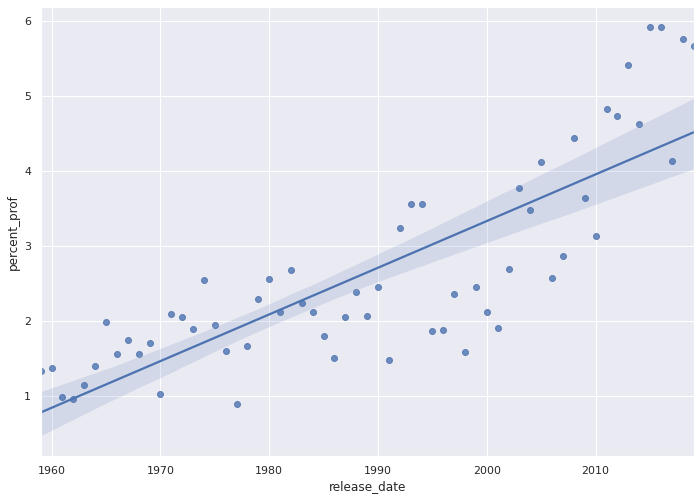

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x=prof_percent_year['release_date'],y=prof_percent_year['percent_prof'],ci=95)

In [63]:
genre_prof = post59.groupby(['release_date','genre'])['percent_prof'].mean().reset_index()
genre_prof

,release_date,genre,percent_prof
0,1959,blues,2.409534
1,1959,country,0.584795
2,1959,pop,1.249632
3,1959,rock,1.785714
4,1960,blues,1.606624
...,...,...,...
270,2018,pop,6.786251
271,2018,rock,0.000000
272,2019,country,4.195083
273,2019,pop,5.946198


In [64]:
# calculating the percentage distribution for each genre each eat
popularity_percentage = post59.groupby('release_date')['genre'].apply(lambda x: x.value_counts(normalize = True)).unstack().to_dict()

In [65]:
popularity_percentage

{'blues': {1959: 0.14705882352941177,
  1960: 0.1891891891891892,
  1961: 0.038461538461538464,
  1962: 0.1346153846153846,
  1963: 0.09090909090909091,
  1964: 0.06779661016949153,
  1965: 0.1276595744680851,
  1966: 0.038461538461538464,
  1967: 0.11363636363636363,
  1968: 0.24444444444444444,
  1969: 0.30303030303030304,
  1970: 0.1282051282051282,
  1971: 0.12195121951219512,
  1972: 0.08888888888888889,
  1973: 0.11666666666666667,
  1974: 0.0425531914893617,
  1975: 0.13114754098360656,
  1976: 0.05128205128205128,
  1977: 0.022222222222222223,
  1978: 0.0625,
  1979: 0.08,
  1980: 0.05555555555555555,
  1981: 0.04225352112676056,
  1982: 0.03508771929824561,
  1983: 0.07936507936507936,
  1984: 0.05172413793103448,
  1985: 0.045454545454545456,
  1986: 0.0196078431372549,
  1987: 0.047619047619047616,
  1988: 0.03773584905660377,
  1989: 0.12244897959183673,
  1990: 0.05405405405405406,
  1991: 0.06896551724137931,
  1992: 0.1,
  1993: 0.06382978723404255,
  1994: 0.03225806451

In [66]:
list(genre_prof.genre.unique())

['blues', 'country', 'pop', 'rock', 'jazz', 'reggae']

In [237]:

# TODO: Color.
# TODO: Normalize column values
def plot_genres(data,popularity):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_theme(style="whitegrid")
#     plt.style.use("bmh")


    plt.style.use("seaborn-dark")

    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = '#2F3235'  # bluish dark grey

    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'  # very light grey
    
    plt.rcParams['axes.linewidth'] = 2
#     ax.grid(color='#2A3459')  # bluish dark grey, but slightly lighter



    genres = list(data['genre'].unique())
    for genre in genres:
        temp = data[data['genre'] == genre]
        
        def popularity_lookup(row):
            year = row[0]
            pop_value = popularity[row[1]][year] * 100
            
            return pop_value
        
        
        temp['percent_share'] = temp.apply(lambda x: popularity_lookup(x), axis=1)
        temp = temp.drop('genre',1)
        
        # normalizing data due to difference in scale
        cols_to_normalize = ['percent_share','percent_prof']
        temp[cols_to_normalize] = temp[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
        
        corr = pearsonr(temp['percent_prof'], temp['percent_share'])
        title_text = f"Genre: {genre.capitalize()}, Correlation value: {corr[0]:.4f}, P-Value: {corr[1]:.4f}"

        sns.lmplot(data=pd.melt(temp,['release_date']), x='release_date', y='value',hue='variable',height=10, palette=['#08F7FE','#FE53BB'] ,aspect=1.2, scatter_kws={"s": 20}, line_kws={"linewidth":4}).set(title=title_text)

### Plotting scores and popularity for each genre across years

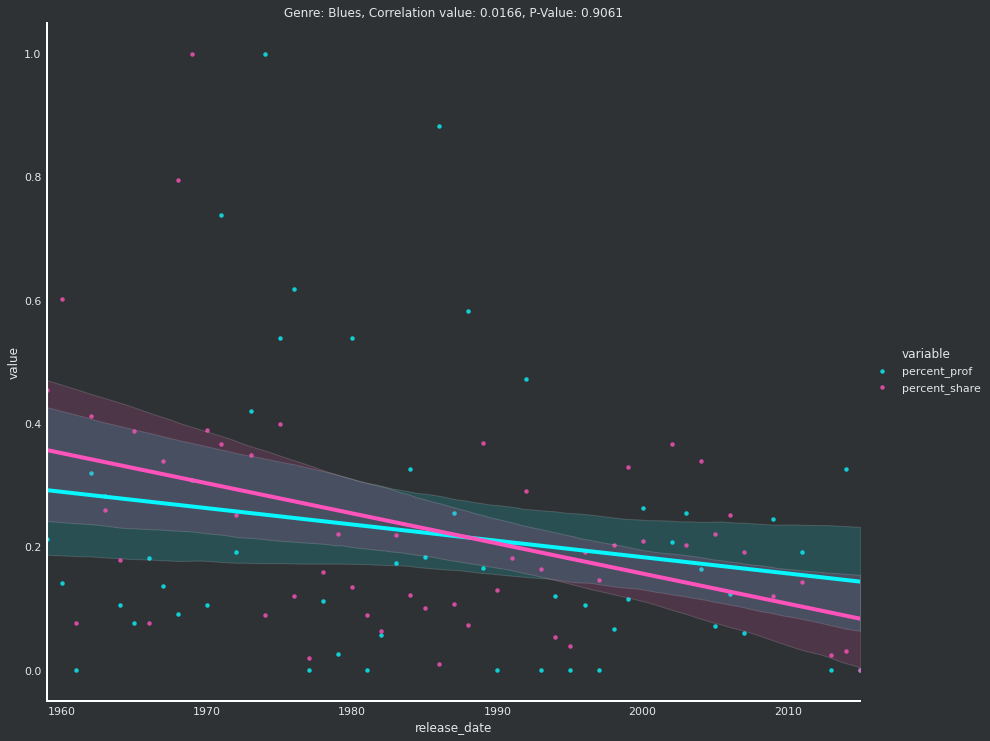

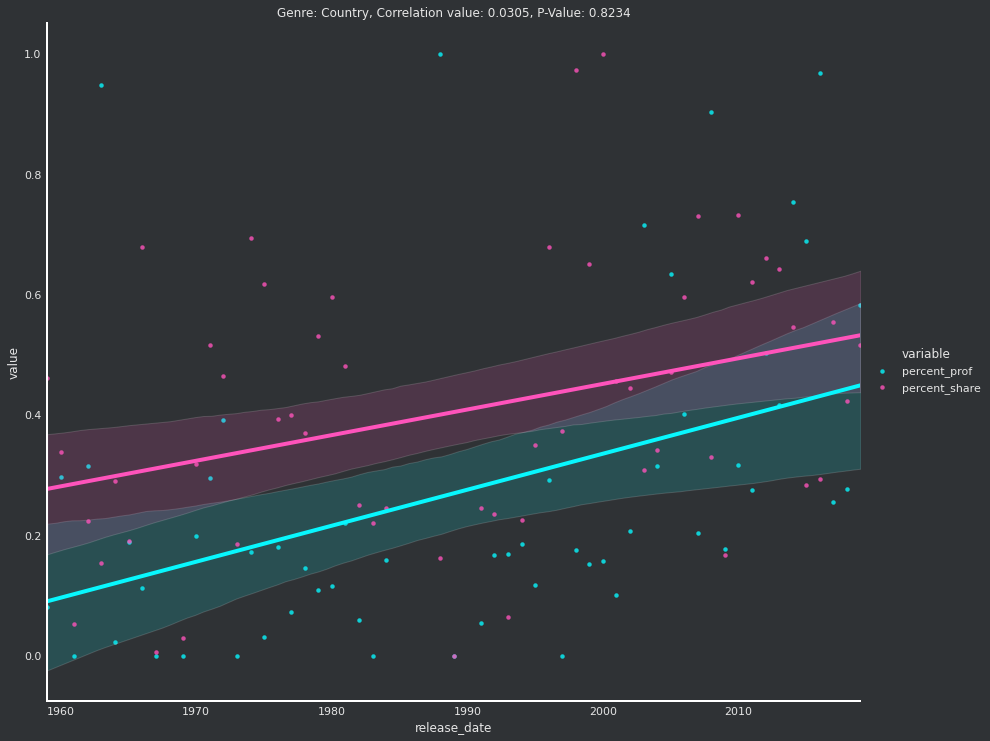

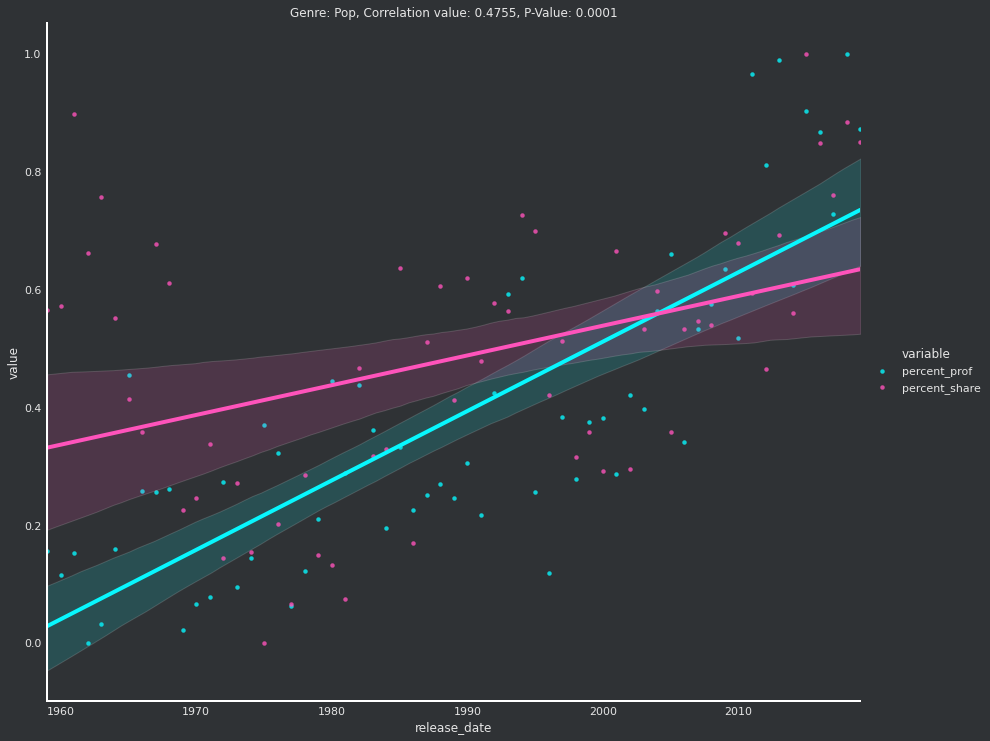

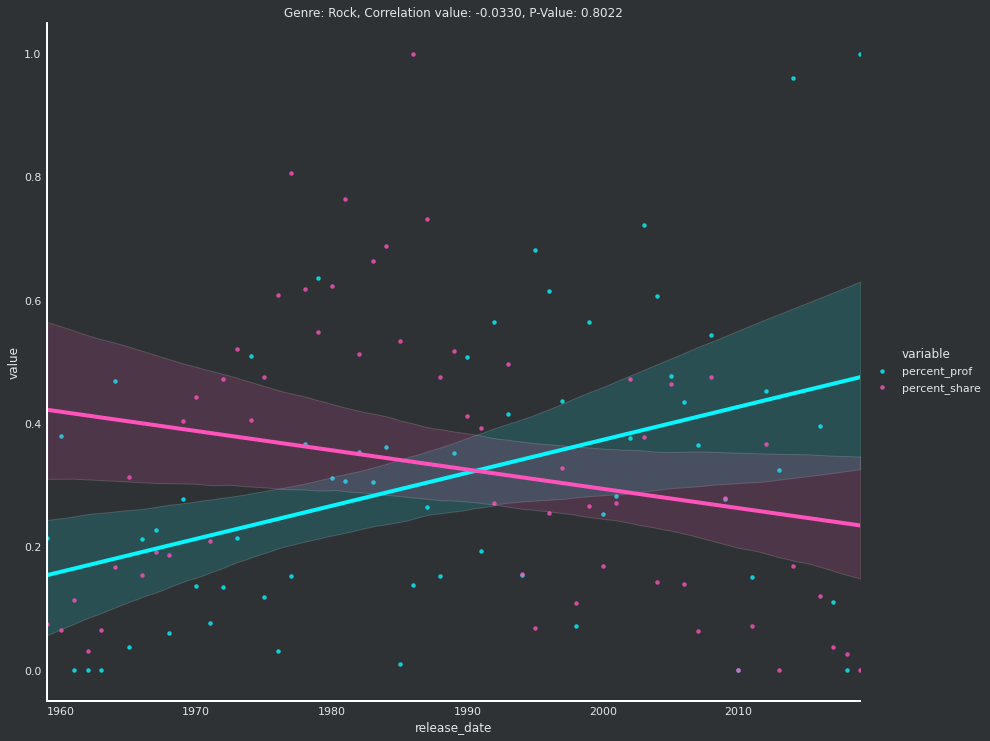

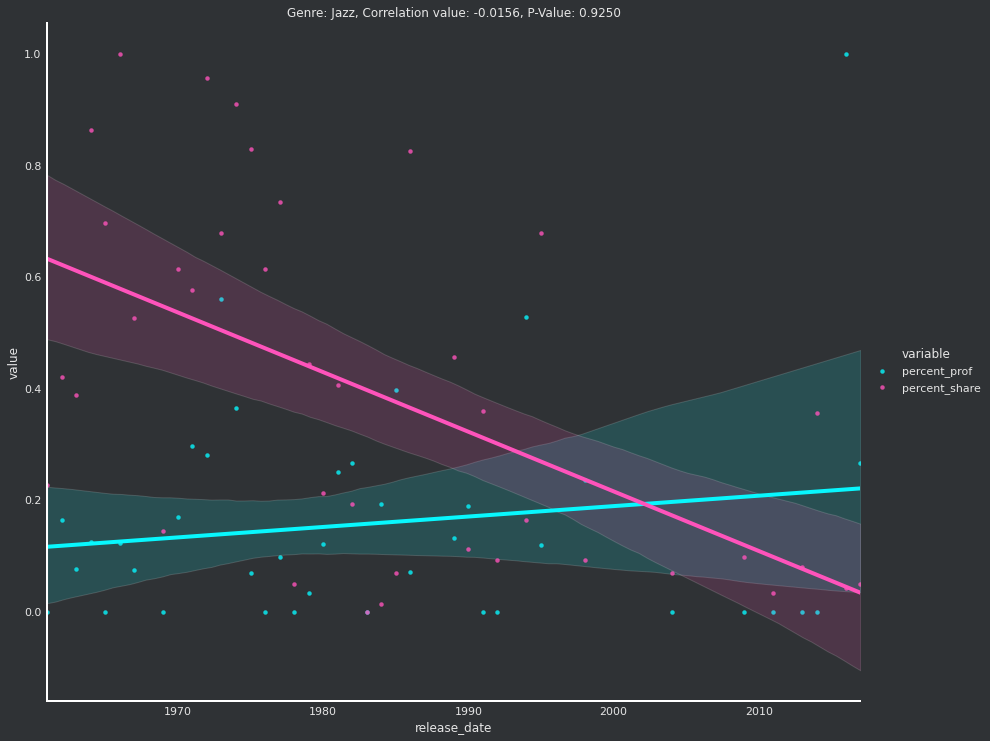

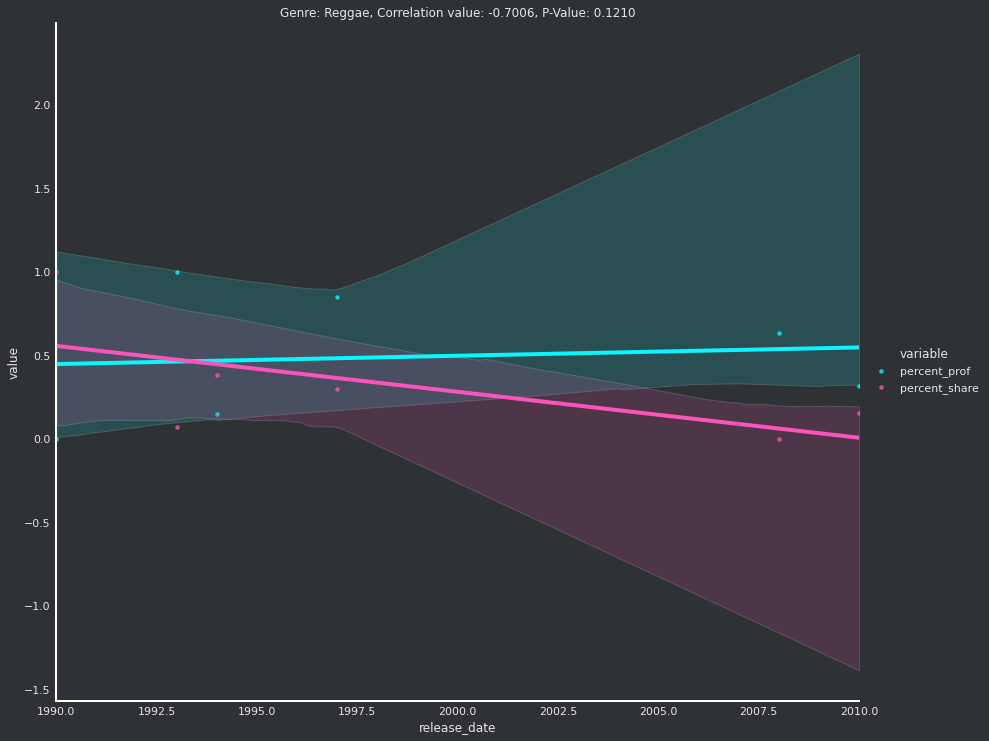

In [238]:
plot_genres(genre_prof, popularity_percentage)

In [69]:
def plot_correlation(data,popularity):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    genres = list(data['genre'].unique())
    for genre in genres:
        temp = data[data['genre'] == genre]
        
        def popularity_lookup(row):
            year = row[0]
            pop_value = popularity[row[1]][year] * 100
            
            return pop_value
        
        
        temp['percent_share'] = temp.apply(lambda x: popularity_lookup(x), axis=1)
        temp = temp.drop('genre',1)
        
        print(genre)
#         print(temp[['percent_prof','percent_share']].corr())
#         print(calculate_pvalues(temp[['percent_prof','percent_share']]))
        print(pearsonr(temp['percent_prof'], temp['percent_share']))



In [70]:
plot_correlation(genre_prof, popularity_percentage)

blues
(0.016604243442472116, 0.9060626197748161)
country
(0.03050627954604497, 0.8233867848128189)
pop
(0.47552986973305095, 0.00010752614119390123)
rock
(-0.03301859495717811, 0.8022401345068886)
jazz
(-0.01557164974815008, 0.9250403582846335)
reggae
(-0.700608749119788, 0.12103469614042132)


<h1><b><center>Conclusion</center></b></h1>

##### Movies:
We observe a noticeable increase in KIM scores over the years, which indicates an increase in explicit content. We also observe an increase across all categories of KIM scores

##### Music: 
We observe an increase in profanity over the years. We also studied the correlation between profanity and genre popularity across the years. While correlation doesn't equal causation, we observe a statistically significant correlation between popularity and profanity for Pop music. 